NAME: CHANDANA DONGRE
  SRN: PES2UG21CS134
  SEC:C


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



#QUESTION 1
#Data description statistics

a.What is the structure (shape) of the dataset?

In [ ]:
data=pd.read_csv("CO2 Emissions_Canada.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
print(data.shape)
print(data.size)

(7385, 12)
88620


b.Show the min, max, and mean of CO2 emission, Fuel
Consumption?

In [ ]:
data.max()

Make                                          VOLVO
Model                                            xD
Vehicle Class                       VAN - PASSENGER
Engine Size(L)                                  8.4
Cylinders                                        16
Transmission                                     M7
Fuel Type                                         Z
Fuel Consumption City (L/100 km)               30.6
Fuel Consumption Hwy (L/100 km)                20.6
Fuel Consumption Comb (L/100 km)               26.1
Fuel Consumption Comb (mpg)                      69
CO2 Emissions(g/km)                             522
dtype: object

In [ ]:
data.min()

Make                                     ACURA
Model                               124 SPIDER
Vehicle Class                          COMPACT
Engine Size(L)                             0.9
Cylinders                                    3
Transmission                               A10
Fuel Type                                    D
Fuel Consumption City (L/100 km)           4.2
Fuel Consumption Hwy (L/100 km)            4.0
Fuel Consumption Comb (L/100 km)           4.1
Fuel Consumption Comb (mpg)                 11
CO2 Emissions(g/km)                         96
dtype: object

In [ ]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Engine Size(L)                        3.160068
Cylinders                             5.615030
Fuel Consumption City (L/100 km)     12.556534
Fuel Consumption Hwy (L/100 km)       9.041706
Fuel Consumption Comb (L/100 km)     10.975071
Fuel Consumption Comb (mpg)          27.481652
CO2 Emissions(g/km)                 250.584699
dtype: float64

c.Comment briefly about the distribution of columns – Model, Fuel Consumption and CO2 emissions.

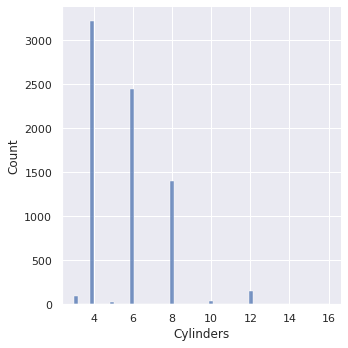

In [ ]:
sns.displot(data=data['Engine Size(L)'],x=data['Cylinders'])

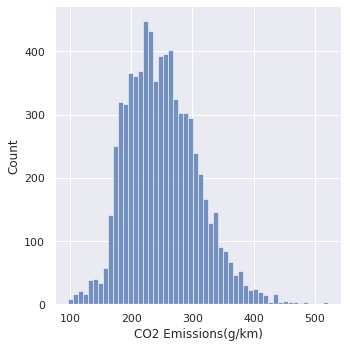

In [66]:
sns.displot(data=data['Fuel Consumption City (L/100 km)'],x=data['CO2 Emissions(g/km)'])

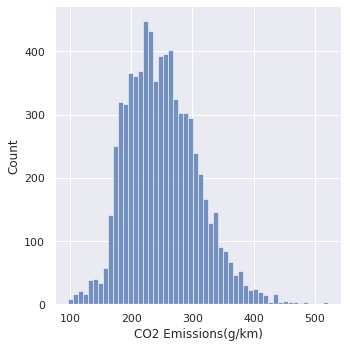

In [65]:
sns.displot(data=data['Model'],x=data['CO2 Emissions(g/km)'])

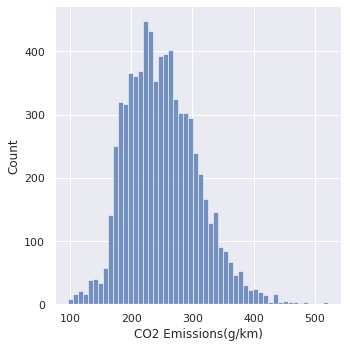

In [64]:
sns.displot(data=data['Fuel Consumption Comb (L/100 km)'],x=data['CO2 Emissions(g/km)'])

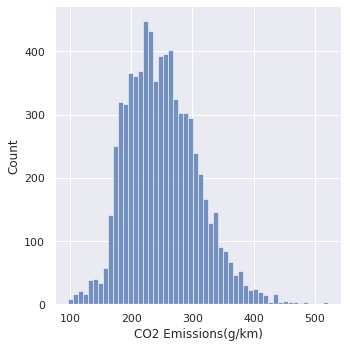

In [63]:
sns.displot(data=data['Fuel Consumption Comb (mpg)'],x=data['CO2 Emissions(g/km)'])

#Question 2
#data preprocessing
a. Encode the categorical columns: Make, Model, Vehicle Class,Transmission, Fuel Type.

In [ ]:

print(data['Model'].unique())
print(data['Make'].unique())

print(data['Vehicle Class'].unique())
print(data['Transmission'].unique())
print(data['Fuel Type'].unique())

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']
['Z' 'D' 'X' 'E' 'N']


In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Model', 'Make','Vehicle Class','Transmission','Fuel Type'])
print(one_hot_encoded_data)

      Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0                2.0          4                               9.9   
1                2.4          4                              11.2   
2                1.5          4                               6.0   
3                3.5          6                              12.7   
4                3.5          6                              12.1   
...              ...        ...                               ...   
7380             2.0          4                              10.7   
7381             2.0          4                              11.2   
7382             2.0          4                              11.7   
7383             2.0          4                              11.2   
7384             2.0          4                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                    

#QUESTION 3
#Data visualization
a.Make Histogram, and whisker plots to understand the meaning of the encoding.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50b2546450>,
      dtype=object)

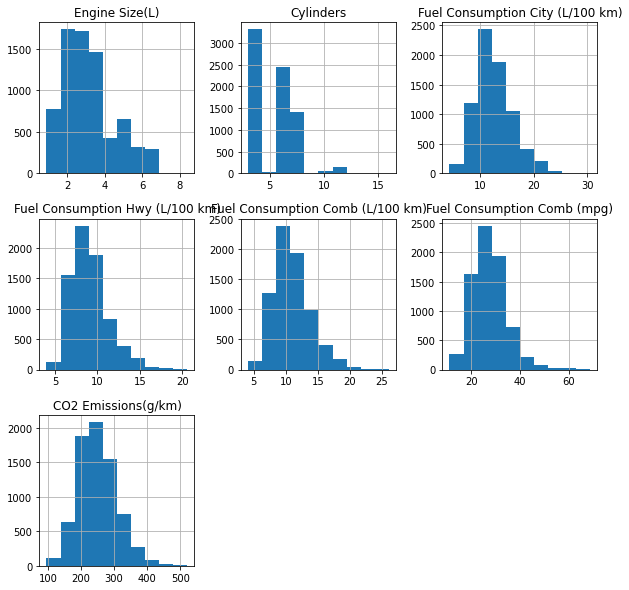

In [ ]:
data.hist(figsize=(10,10))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


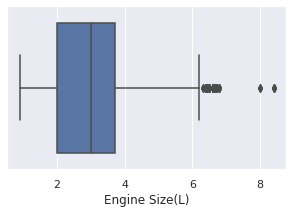

In [ ]:
sns.boxplot(data["Engine Size(L)"])


#Question 4
#Hypothesis testing
a.Perform Z-statistics test on various columns? And do Hypothesis Test

In [ ]:
data["CO2 Emissions(g/km)"].describe()

count    7385.000000
mean      250.584699
std        58.512679
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: CO2 Emissions(g/km), dtype: float64

b.Is there any multi-collinearity between the columns?

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

list_of_num = ['int64','float64']
numeric_df = data.select_dtypes(list_of_num)
numeric_df.head()

vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns

vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i)
                          for i in range(len(numeric_df.columns))]

(vif_data.sort_values("VIF"))

,feature,VIF
5,Fuel Consumption Comb (mpg),7.900289
0,Engine Size(L),54.672007
1,Cylinders,84.597442
6,CO2 Emissions(g/km),143.886238
3,Fuel Consumption Hwy (L/100 km),9928.415863
2,Fuel Consumption City (L/100 km),28573.424593
4,Fuel Consumption Comb (L/100 km),71279.914481


In [ ]:
zvalue= (251 - data["CO2 Emissions(g/km)"].mean()) / (data["CO2 Emissions(g/km)"].std() )
zprob=scipy.stats.norm.cdf(zvalue)
print("The probability of the null hypothesis is ",zprob)
print("This value is greater then the alpha value that we have. Therefore, the null hypothesis cannot be rejected")


The probability of the null hypothesis is  0.5028315204995373
This value is greater then the alpha value that we have. Therefore, the null hypothesis cannot be rejected


c. Perform correlation Analysis.

Correlation matrix is : 
                                  Engine Size(L)  Cylinders  \
Engine Size(L)                          1.000000   0.927653   
Cylinders                               0.927653   1.000000   
Fuel Consumption City (L/100 km)        0.831379   0.800702   
Fuel Consumption Hwy (L/100 km)         0.761526   0.715252   
Fuel Consumption Comb (L/100 km)        0.817060   0.780534   
Fuel Consumption Comb (mpg)            -0.757854  -0.719321   
CO2 Emissions(g/km)                     0.851145   0.832644   

                                  Fuel Consumption City (L/100 km)  \
Engine Size(L)                                            0.831379   
Cylinders                                                 0.800702   
Fuel Consumption City (L/100 km)                          1.000000   
Fuel Consumption Hwy (L/100 km)                           0.948180   
Fuel Consumption Comb (L/100 km)                          0.993810   
Fuel Consumption Comb (mpg)                       

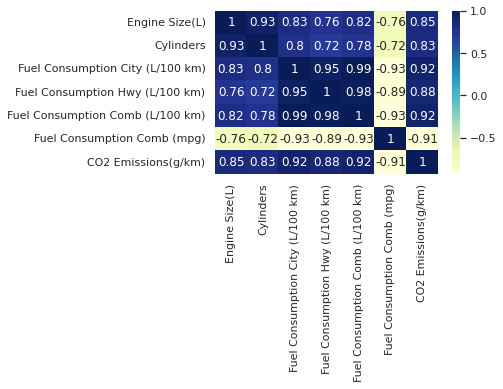

In [ ]:
matrix = data.corr()
print("Correlation matrix is : ")
print(matrix)
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

#QUESTION 5
#Modelling
a. Build a Linear Regression Model

In [ ]:
X, y = data["CO2 Emissions(g/km)"], data["Engine Size(L)"]
print("Initial shape",X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Training Data: ",X_train.shape, y_train.shape)
print("Testing Data: ",X_test.shape, y_test.shape)


Initial shape (7385,) (7385,)
Training Data:  (5908,) (5908,)
Testing Data:  (1477,) (1477,)


b.Give the coefficients of the model

In [ ]:
model = LinearRegression()
model.fit(np.array(X_train).reshape((-1, 1)), y_train)


LinearRegression()

In [ ]:
r_sq = model.score(np.array(X_train).reshape((-1, 1)), y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.7294404932957087
intercept: -1.7711202556099863
slope: [0.0196705]


c. Comparing predictions and accuracy.

In [ ]:
yhat = model.predict(np.array(X_test).reshape((-1, 1)))
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_test, yhat)
print('MSE: %.3f' % mse)

MAE: 0.581
MSE: 0.558
